In [3]:
#!pip install tensorflow

     |████████████████████████████████| 102.7MB 461kB/s  eta 0:00:01    |███████████▎                    | 36.1MB 16.0MB/s eta 0:00:05     |████████████▎                   | 39.6MB 16.0MB/s eta 0:00:04     |█████████████                   | 42.0MB 16.0MB/s eta 0:00:04     |████████████████████████████    | 90.0MB 13.3MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/95/00/5e6cdf86190a70d7382d320b2b04e4ff0f8191a37d90a422a2f8ff0705bb/tensorflow_estimator-2.0.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d1/4f/950dfae467b384fc96bc6469de25d832534f6b4441033c39f914efd13418/astor-0.8.0-py2.py3-none-any.whl
     |████████████████████████████████| 2.1MB 13.5MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/9b/a6/e8ffa4e2ddb216449d34cfcb825ebb38206bee5c4553d69e7bc8bc2c5d64/tensorboard-2.0.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3b/72/e6e483e2db953c11efa44ee21c5fdb6505c4dffa447b4263ca8af6

In [7]:
#!pip install opencv-python

     |████████████████████████████████| 51.6MB 13.7MB/s eta 0:00:01     |████████████████████▊           | 33.4MB 12.1MB/s eta 0:00:02     |██████████████████████████████▊ | 49.5MB 13.7MB/s eta 0:00:01


In [54]:
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras import optimizers
from keras.applications import VGG16
from keras.applications import ResNet50
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.font_manager as fm
from keras.models import load_model

In [55]:
pre_trained_model = VGG16()

In [56]:
width = 150
height = 150

In [57]:
train_dir = "/Users/joannakang/Desktop/190920/RSP/train"
test_dir = "/Users/joannakang/Desktop/190920/RSP/test"

In [58]:
class_name = os.listdir(train_dir)
print (class_name)

['paper', 'rock', 'scissors']


In [59]:
train_input = []
train_label = []

In [60]:
test_input = []
test_label = []

In [61]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(class_name)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

print(onehot_encoded)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


/Users/joannakang/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [62]:
for i in range(len(class_name)):
    path = os.path.join(train_dir, class_name[i])
    img_list = os.listdir(path)
    for j in img_list:
        img = os.path.join(path, j)
        img = cv2.imread(img, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (width, height), interpolation = cv2.INTER_CUBIC)
        img = img.reshape((150, 150, 3))
        train_input.append(img)
        train_label.append(onehot_encoded[i])

In [63]:
for i in range(len(class_name)):
    path = os.path.join(test_dir, class_name[i])
    img_list = os.listdir(path)
    for j in img_list:
        img = os.path.join(path, j)
        img = cv2.imread(img, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (width, height), interpolation = cv2.INTER_CUBIC)
        img = img.reshape((150, 150, 3))
        test_input.append(img)
        test_label.append(onehot_encoded[i])

In [64]:
path = os.path.join(train_dir, class_name[0])
img_list = os.listdir(path)
print (img_list)

['IMG_20190913_192935.jpg', 'KakaoTalk_Photo_2019-09-13-19-47-31.jpeg', 'IMG_20190913_192927.jpg', 'IMG_20190913_192933.jpg', 'IMG_20190913_192932.jpg', 'IMG_20190913_192919.jpg', 'IMG_20190913_192925.jpg', 'IMG_20190913_192931.jpg', 'KakaoTalk_Photo_2019-09-13-19-47-40.jpeg', 'KakaoTalk_Photo_2019-09-13-19-49-25.jpeg', 'IMG_9727.jpg', 'IMG_9726.jpg', 'IMG_9730.jpg', 'IMG_9728.jpg', 'IMG_9729.jpg', 'KakaoTalk_Photo_2019-09-13-19-46-23.jpeg', '4.jpg', 'KakaoTalk_Photo_2019-09-13-19-45-02.jpeg', 'IMG_20190913_192929.jpg', '5.jpg', '7.jpg', '6.jpg', '2.jpg', 'KakaoTalk_Photo_2019-09-13-19-46-33.jpeg', 'KakaoTalk_Photo_2019-09-13-19-48-40.jpeg', '3.jpg', '1.jpg', 'KakaoTalk_Photo_2019-09-13-19-44-38.jpeg', 'KakaoTalk_Photo_2019-09-13-19-45-15.jpeg']


In [65]:
print(len((train_input)))
print(len(train_label))
print(len((test_input)))
print(len((test_label)))

85
85
15
15


In [66]:
train_input, val_input, train_label, val_label = train_test_split(train_input, train_label, test_size=0.2, random_state=32)

In [67]:
print(len(train_input))
print(len(val_input))
print(len(test_input))

68
17
15


In [68]:
train_input = np.array(train_input)
train_label = np.array(train_label)
val_input = np.array(val_input)
val_label = np.array(val_label)
test_input = np.array(test_input)
test_label = np.array(test_label)

In [69]:
print(train_input.shape)
print(val_input.shape)
print(test_input.shape)

(68, 150, 150, 3)
(17, 150, 150, 3)
(15, 150, 150, 3)


In [70]:
pre_trained_model = VGG16()

In [71]:
pre_trained_model.summary()
#trainable parameter = 파라미터 안에 가중치가 없다
#non-trainable parameter : 이미 모델 안에 가중치가 설정되어있다.

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [72]:
#가중치가 설정 안되어있는 모델
pre_trained_model = VGG16(include_top = False, input_shape = (150, 150, 3))

In [73]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [74]:
#가중치를 고정시키겠다는 뜻
pre_trained_model.trainable = False

In [75]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [76]:
model = Sequential()
model.add(pre_trained_model)
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='softmax'))
#마지막 라인의 Dense(N) / N=은 구분하고자 하는 갯수와 같아야 함

In [77]:
model.summary()
#vgg16  = 다른 모델에서 가져온 구조
#dense_1~4 = 새로 붙인 top 부분

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 20)                163860    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 21        
Total params: 14,878,845
Trainable params: 164,157
Non-trainable params: 14,714,688
____________________________________

In [78]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [79]:
history = model.fit(x = train_input, y = train_label, validation_data = (val_input, val_label), batch_size = 5, epochs = 10)

Train on 68 samples, validate on 17 samples
Epoch 1/10
68/68 [==============================] - 9s 127ms/step - loss: 2.8200 - accuracy: 0.4412 - val_loss: 1.0589 - val_accuracy: 0.5294
Epoch 2/10
68/68 [==============================] - 8s 124ms/step - loss: 1.2268 - accuracy: 0.4706 - val_loss: 0.7635 - val_accuracy: 0.7059
Epoch 3/10
68/68 [==============================] - 8s 123ms/step - loss: 0.5753 - accuracy: 0.7500 - val_loss: 0.7926 - val_accuracy: 0.5294
Epoch 4/10
68/68 [==============================] - 8s 122ms/step - loss: 0.4640 - accuracy: 0.6912 - val_loss: 0.7931 - val_accuracy: 0.4706
Epoch 5/10
68/68 [==============================] - 8s 123ms/step - loss: 0.3975 - accuracy: 0.8382 - val_loss: 0.8404 - val_accuracy: 0.5294
Epoch 6/10
68/68 [==============================] - 8s 122ms/step - loss: 0.3599 - accuracy: 0.8382 - val_loss: 0.8989 - val_accuracy: 0.5294
Epoch 7/10
68/68 [==============================] - 9s 136ms/step - loss: 0.2840 - accuracy: 0.9559 - va

In [80]:
plt.rcParams['lines.linewidth'] = 2

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

KeyError: 'acc'

In [81]:
result = model.predict(test_input)

In [82]:
test_real_label = []
test_predicted_label = []

In [83]:
for i in range(len(test_label)):
    if str(np.argmax(test_label[i])) == '0':
        test_real_label.append('보')
    elif str(np.argmax(test_label[i])) == '1':
        test_real_label.append('바위')
    else:
        test_real_label.append('가위')

In [84]:
for i in range(len(result)):
    if str(np.argmax(result[i])) == '1':
        test_predicted_label.append('바위')
    elif str(np.argmax(result[i])) == '0':
        test_predicted_label.append('보')
    else:
        test_predicted_label.append('가위')

In [85]:
on_gothic = '/Users/joannakang/Desktop/Font/나눔손글씨 암스테르담.ttf'
fontprop1 = fm.FontProperties(fname=on_gothic, size=13)

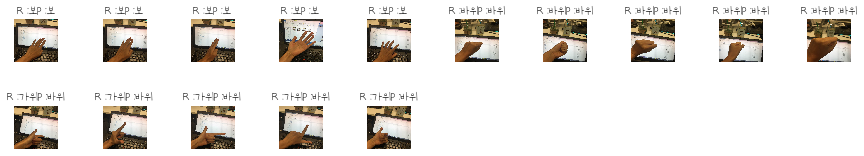

In [90]:
plt.figure(figsize=(15, 15))

for i in range(len(test_input)):
    plt.subplot(3, 10, i + 1)
    plt.axis('off')
    plt.imshow(test_input[i])
    plt.title('R :' + test_real_label[i] + 'P :' + test_predicted_label[i], fontproperties = fontprop1)
    plt.subplots_adjust(top = 1, bottom= 0.8, hspace= 1, wspace= 1)
plt.show()

In [88]:
print(len(test_input))

15
